In [349]:
import math
import numpy as np
import os

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()
sns.set_style("ticks")
sns.set_context("paper")
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [317]:
three_d_points = np.array([
    [-0.08, -2.30333333, 1.19666667],  # Top right solar panel
    [-0.15666667, -0.84333333, 1.19666667],  # Top left solar panel
    [-0.08, -2.30333333, -0.78333333],  # Bottom right solar panel
    [-0.15666667, -0.84333333, -0.78333333],  # Bottom left solar panel
    [-0.24333333, 1.03, -0.65333333],  # Bottom left satellite
])

# three_d_points_extra = three_d_points - np.array([0.2799, -0.1329, -0.1785])

three_d_points_names = [
    'Top right solar panel',
    'Top left solar panel',
    'Bottom right solar panel',
    'Bottom left solar panel',
    'Bottom left satellite'
]


def get_normalized_rotation(roll, pitch, yaw):
    roll_rotation_axis = -19.4321
    pitch_rotation_axis = 0
    yaw_rotation_axis = 179.9654
    r_roll_rotation_axis = np.array([[1, 0, 0],
                                     [0, math.cos(roll_rotation_axis / 180 * math.pi),
                                      -math.sin(roll_rotation_axis / 180 * math.pi)],
                                     [0, math.sin(roll_rotation_axis / 180 * math.pi),
                                      math.cos(roll_rotation_axis / 180 * math.pi)]])

    r_pitch_rotation_axis = np.array(
        [[math.cos(pitch_rotation_axis / 180 * math.pi), 0, math.sin(pitch_rotation_axis / 180 * math.pi)],
         [0, 1, 0],
         [-math.sin(pitch_rotation_axis / 180 * math.pi), 0, math.cos(pitch_rotation_axis / 180 * math.pi)]])

    r_yaw_rotation_axis = np.array(
        [[math.cos(yaw_rotation_axis / 180 * math.pi), -math.sin(yaw_rotation_axis / 180 * math.pi), 0],
         [math.sin(yaw_rotation_axis / 180 * math.pi), math.cos(yaw_rotation_axis / 180 * math.pi), 0],
         [0, 0, 1]])

    rotation_matrix_rotation_axis = r_yaw_rotation_axis @ r_pitch_rotation_axis @ r_roll_rotation_axis

    r_roll = np.array([[1, 0, 0],
                       [0, math.cos(roll / 180 * math.pi), -math.sin(roll / 180 * math.pi)],
                       [0, math.sin(roll / 180 * math.pi), math.cos(roll / 180 * math.pi)]])

    r_pitch = np.array([[math.cos(pitch / 180 * math.pi), 0, math.sin(pitch / 180 * math.pi)],
                        [0, 1, 0],
                        [-math.sin(pitch / 180 * math.pi), 0, math.cos(pitch / 180 * math.pi)]])

    r_yaw = np.array([[math.cos(yaw / 180 * math.pi), -math.sin(yaw / 180 * math.pi), 0],
                      [math.sin(yaw / 180 * math.pi), math.cos(yaw / 180 * math.pi), 0],
                      [0, 0, 1]])

    rotation_matrix = (r_yaw @ r_pitch @ r_roll)

    roll = np.rad2deg(math.atan2(rotation_matrix[2, 1], rotation_matrix[2, 2]))
    pitch = np.rad2deg(
        math.atan2(-rotation_matrix[2, 0],
                   math.sqrt(rotation_matrix[2, 1] ** 2 + rotation_matrix[2, 2] ** 2)))
    yaw = np.rad2deg(
        math.atan2(rotation_matrix[1, 0], rotation_matrix[0, 0]))

    return roll, pitch, yaw


def get_rotated_point(roll, pitch, yaw, point=None):
    if point is None:
        point = [-0.08, -2.30333333, 1.19666667]

    r_roll = np.array([[1, 0, 0],
                       [0, math.cos(roll / 180 * math.pi), -math.sin(roll / 180 * math.pi)],
                       [0, math.sin(roll / 180 * math.pi), math.cos(roll / 180 * math.pi)]])

    r_pitch = np.array([[math.cos(pitch / 180 * math.pi), 0, math.sin(pitch / 180 * math.pi)],
                        [0, 1, 0],
                        [-math.sin(pitch / 180 * math.pi), 0, math.cos(pitch / 180 * math.pi)]])

    r_yaw = np.array([[math.cos(yaw / 180 * math.pi), -math.sin(yaw / 180 * math.pi), 0],
                      [math.sin(yaw / 180 * math.pi), math.cos(yaw / 180 * math.pi), 0],
                      [0, 0, 1]])

    rotation_matrix = r_yaw @ r_pitch @ r_roll

    rotated_3d_points = np.dot(rotation_matrix, point)

    return rotated_3d_points

In [318]:
folder = "../test_images/dynamic_unknowndeg_0to360_5degstep/"
suffix = '_eps2_final_strict'
colors = ['red', 'green', 'blue']
normalize = True

In [351]:
import subprocess

In [357]:
def to_latex_table(df, caption, label, decimal=3):
    text = df.to_latex(index=False, escape=True,
                       caption=caption,
                       label=label, float_format=f'%.{decimal}f',
                       position="h", longtable=True)
    subprocess.run("pbcopy", text=True, input=text)



In [319]:
df_true = pd.read_csv(folder + "real_scores.csv")
df_true = df_true.rename(columns={'real_roll': 'roll', 'real_pitch': 'pitch', 'real_yaw':
    'yaw'})
# if normalize:
#     df_true['roll'], df_true['pitch'], df_true['yaw'] = np.vectorize(get_normalized_rotation)(df_true['roll'],
#                                                                                               df_true['pitch'],
#                                                                                               df_true['yaw'])
df_true['img_number'] = df_true.index
# drop first image
df_true = df_true.drop(df_true.index[0])

In [355]:
# to_latex_table(df_true, 'True scores', 'true_scores')

In [320]:
df_guess = pd.read_csv(folder + "guesses" + suffix + ".csv")
# drop first image
df_guess = df_guess.drop(df_guess.index[0])
# if normalize:
#     df_guess['roll'], df_guess['pitch'], df_guess['yaw'] = np.vectorize(get_normalized_rotation)(df_guess['roll'],
#                                                                                                  df_guess['pitch'],
#                                                                                                  df_guess['yaw'])
#     df_guess['roll_min'], df_guess['pitch_min'], df_guess['yaw_min'] = np.vectorize(get_normalized_rotation)(
#         df_guess['roll_min'],
#         df_guess['pitch_min'],
#         df_guess['yaw_min'])
#     df_guess['roll_max'], df_guess['pitch_max'], df_guess['yaw_max'] = np.vectorize(get_normalized_rotation)(
#         df_guess['roll_max'],
#         df_guess['pitch_max'],
#         df_guess['yaw_max'])

In [360]:
# to_latex_table(df_guess, 'Guesses', 'guesses', 3)

In [321]:
df = pd.read_csv(folder + "fine_scores" + suffix + ".csv")
# drop first image
df = df.drop(df.index[0])
if normalize:
    df['roll'], df['pitch'], df['yaw'] = np.vectorize(get_normalized_rotation)(df['roll'],
                                                                               df['pitch'],
                                                                               df['yaw'])

In [363]:
df

,img_number,iterations,loss,roll,pitch,yaw,x,y,z
1,1,728,1.123213e+03,153.323242,-59.821898,-77.152341,0.321378,0.127557,-0.252949
2,2,490,3.517797e-11,160.791879,-64.480795,-85.072976,0.216917,0.096086,-0.476752
3,3,651,1.230418e-09,156.693282,-64.454293,-86.003940,0.226879,0.099353,-0.473769
4,4,1246,3.978089e-10,153.626644,-63.943973,-88.061305,0.230012,0.105719,-0.529154
5,5,1015,1.890654e+00,150.311431,-64.620556,-89.583903,0.224809,0.104893,-0.629154
...,...,...,...,...,...,...,...,...,...
139,139,294,1.483023e-01,-178.854643,-68.172823,-69.802648,0.177311,0.024065,-0.389021
140,140,378,3.181316e-11,179.598182,-67.380676,-73.331470,0.174721,0.039343,-0.435969
141,141,406,1.588886e-04,174.893854,-65.935735,-73.420776,0.176657,0.033880,-0.476668
142,142,371,3.691738e-01,169.440381,-64.427476,-72.836874,0.182370,0.024765,-0.522410


In [362]:
to_latex_table(df, 'Fine scores', 'fine_scores', 3)

In [322]:
df_rough = pd.read_csv(folder + "best_scores.csv")
# drop first image
df_rough = df_rough.drop(df_rough.index[0])
df_rough['img_number'] = df_rough['file_name']
if normalize:
    df_rough['roll'], df_rough['pitch'], df_rough['yaw'] = np.vectorize(get_normalized_rotation)(df_rough['roll'],
                                                                                                 df_rough['pitch'],
                                                                                                 df_rough['yaw'])

<Axes: xlabel='img_number', ylabel='x'>

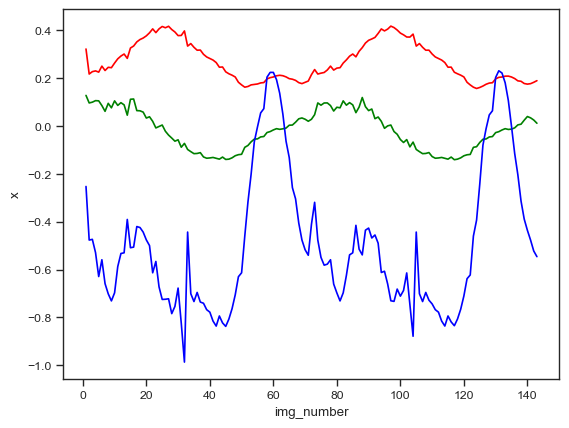

In [323]:
sns.lineplot(df, x='img_number', y='x', ci=None, color='red')
sns.lineplot(df, x='img_number', y='y', ci=None, color='green')
sns.lineplot(df, x='img_number', y='z', ci=None, color='blue')

In [324]:
def plot_guess(guess_type, df=df_guess):
    sns.lineplot(data=df, x='img_number', y=guess_type, color='blue', ci=None)
    sns.lineplot(data=df, x='img_number', y=guess_type + '_min', color='red', ci=None)
    sns.lineplot(data=df, x='img_number', y=guess_type + '_max', color='green', ci=None)
    sns.scatterplot(data=df, x='img_number', y=guess_type, color='black')
    plt.legend(['Guess', 'Min', 'Max', 'Lowest loss estimate'])
    plt.title('SMA ' + guess_type + ' guesses')
    plt.xlabel('Image number')
    if guess_type in ['roll', 'pitch', 'yaw']:
        plt.ylabel(guess_type + ' (deg)')

    else:
        plt.ylabel(guess_type + ' (m)')

    plt.savefig(folder + "/plots/" + guess_type + '_guesses' + suffix + '.png')
    plt.show()

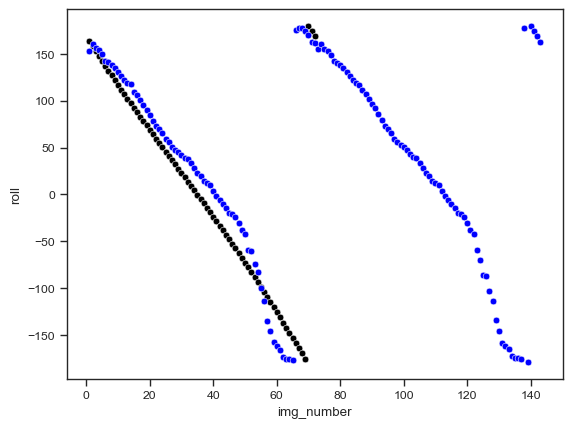

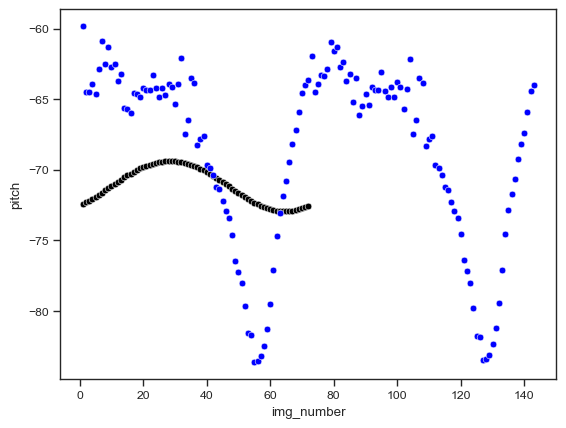

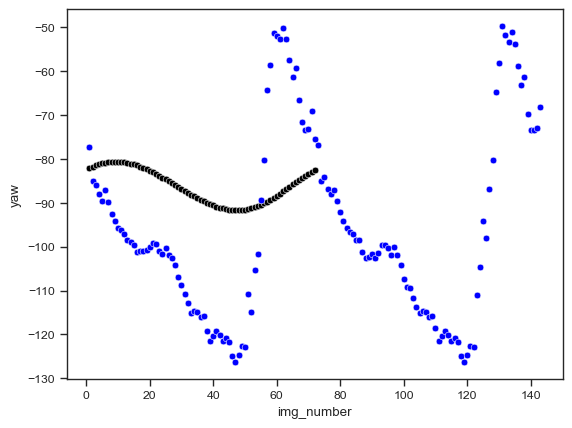

In [325]:
for guess_type in ['roll', 'pitch', 'yaw']:
    sns.scatterplot(data=df_true, x='img_number', y=guess_type, color='black')
    sns.scatterplot(data=df, x='img_number', y=guess_type, color='blue')
    # sns.scatterplot(data=df_rough, x='img_number', y=guess_type, color='green')
    plt.show()

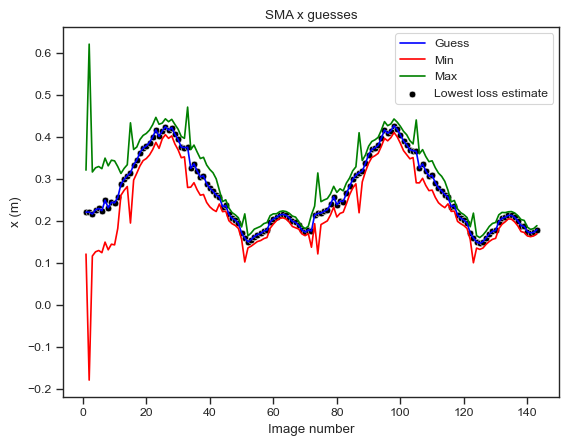

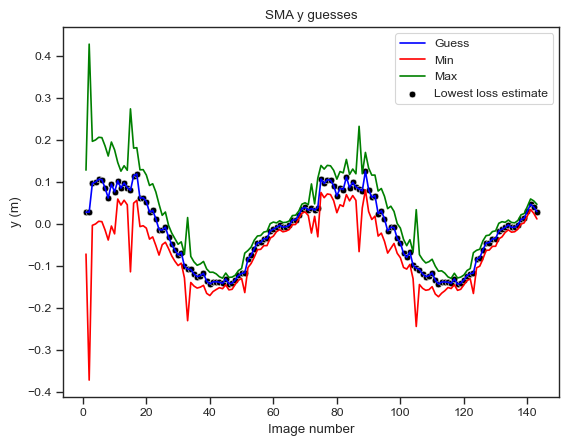

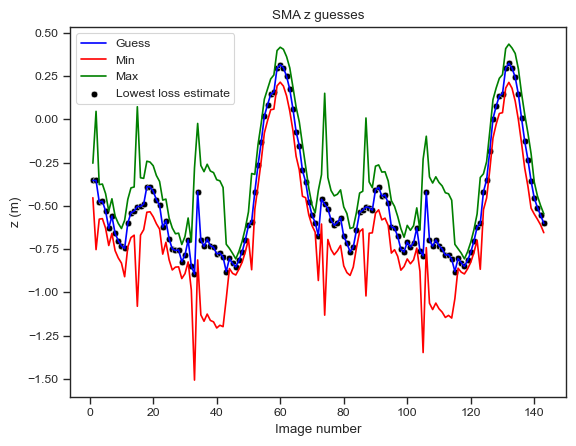

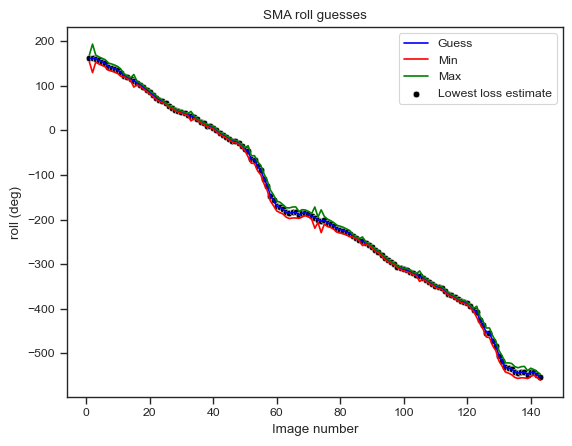

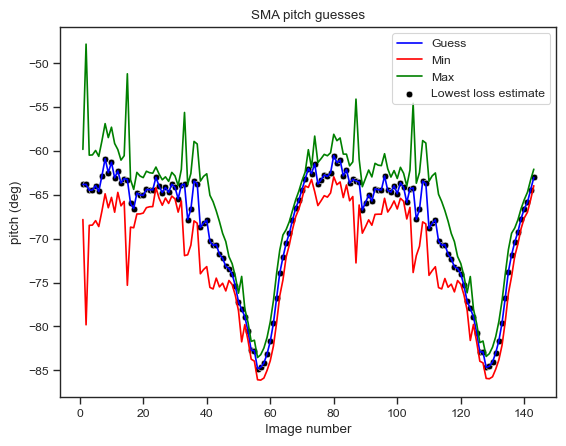

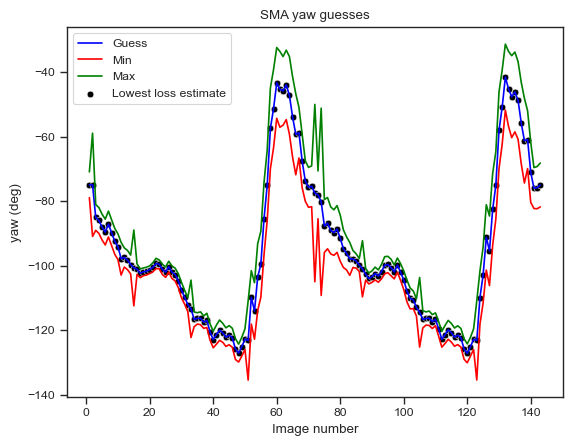

In [326]:
for guess_type in ['x', 'y', 'z', 'roll', 'pitch', 'yaw']:
    plot_guess(guess_type)

In [327]:
def plot_translation(trans_type):
    sns.scatterplot(data=df, x='img_number', y=trans_type, color='black')
    mean = df[trans_type].mean()
    plt.axhline(mean, color='red', linestyle='dashed', linewidth=1)
    std = df[trans_type].std()
    plt.axhline(mean + std, color='green', linestyle='dashed', linewidth=1)
    plt.axhline(mean - std, color='green', linestyle='dashed', linewidth=1)
    plt.title(trans_type + ' estimates for CoM')
    plt.xlabel('Image number')
    plt.ylabel(trans_type + ' (m)')
    plt.legend([trans_type + ' estimates', 'Mean', 'Standard deviation'])
    plt.show()

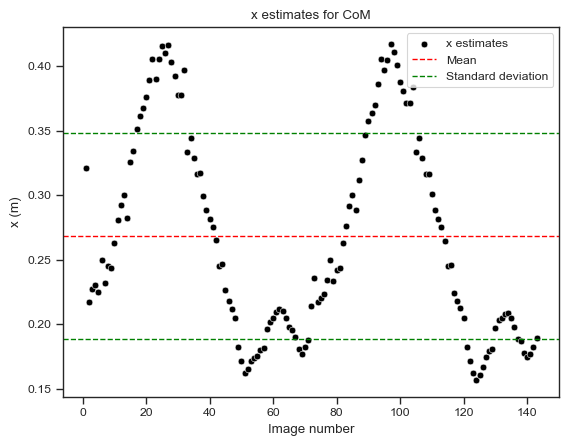

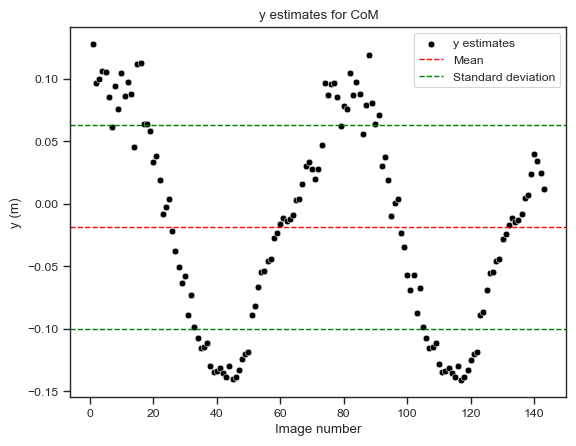

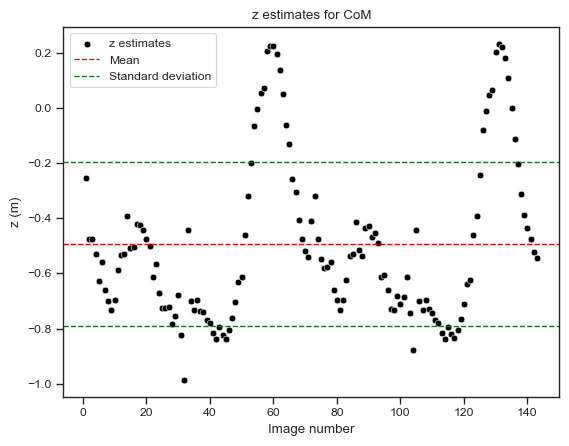

In [328]:
for i in ['x', 'y', 'z']:
    plot_translation(i)

In [329]:
df_rotated_points_true = pd.DataFrame()
for i, point in enumerate(three_d_points):
    df_local = df_true.apply(
        lambda row: get_rotated_point(row['roll'], row['pitch'], row['yaw'], point),
        axis=1, result_type='expand').rename(columns={0: 'x_point', 1: 'y_point', 2: 'z_point'})
    df_local['img_number'] = df_true['img_number']
    df_local['3d_point'] = three_d_points_names[i]
    df_rotated_points_true = pd.concat([df_local, df_rotated_points_true])

In [330]:
df_rotated_points_true = df_rotated_points_true.merge(df_true, on='img_number')

In [331]:
df_rotated_points = pd.DataFrame()
for i, point in enumerate(three_d_points):
    df_local = df.apply(
        lambda row: get_rotated_point(row['roll'], row['pitch'], row['yaw'], point),
        axis=1, result_type='expand').rename(columns={0: 'x_point', 1: 'y_point', 2: 'z_point'})
    df_local['img_number'] = df['img_number']
    df_local['3d_point'] = three_d_points_names[i]
    df_rotated_points = pd.concat([df_local, df_rotated_points])
# df_rotated_points.to_csv(folder + 'rotated_points.csv')

In [332]:
df_rotated_points = df_rotated_points.merge(df, on='img_number')

In [333]:
df_rotated_points_rough = pd.DataFrame()
for i, point in enumerate(three_d_points):
    df_local = df_rough.apply(
        lambda row: get_rotated_point(row['roll'], row['pitch'], row['yaw'], point),
        axis=1, result_type='expand').rename(columns={0: 'x_point', 1: 'y_point', 2: 'z_point'})
    df_local['img_number'] = df_rough['img_number']
    df_local['3d_point'] = three_d_points_names[i]
    df_rotated_points_rough = pd.concat([df_local, df_rotated_points_rough])

In [334]:
df_rotated_points

,x_point,y_point,z_point,img_number,3d_point,iterations,loss,roll,pitch,yaw,x,y,z
0,-0.839649,0.861605,0.315567,1,Bottom left satellite,728,1123.213127,153.323242,-59.821898,-77.152341,0.321378,0.127557,-0.252949
1,0.998297,0.593370,0.026096,1,Bottom left solar panel,728,1123.213127,153.323242,-59.821898,-77.152341,0.321378,0.127557,-0.252949
2,2.404792,0.293431,-0.237129,1,Bottom right solar panel,728,1123.213127,153.323242,-59.821898,-77.152341,0.321378,0.127557,-0.252949
3,0.471705,-1.095449,-0.863280,1,Top left solar panel,728,1123.213127,153.323242,-59.821898,-77.152341,0.321378,0.127557,-0.252949
4,1.878199,-1.395388,-1.126506,1,Top right solar panel,728,1123.213127,153.323242,-59.821898,-77.152341,0.321378,0.127557,-0.252949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,-1.077769,0.590221,0.192375,143,Bottom left satellite,700,2770.692157,162.237143,-63.964741,-68.204546,0.189127,0.011350,-0.546018
711,0.779040,0.858503,0.073737,143,Bottom left solar panel,700,2770.692157,162.237143,-63.964741,-68.204546,0.189127,0.011350,-0.546018
712,2.231137,0.971898,-0.052879,143,Bottom right solar panel,700,2770.692157,162.237143,-63.964741,-68.204546,0.189127,0.011350,-0.546018
713,0.847236,-0.938930,-0.753902,143,Top left solar panel,700,2770.692157,162.237143,-63.964741,-68.204546,0.189127,0.011350,-0.546018


In [335]:
df_rotated_points_rough = df_rotated_points_rough.merge(df_rough, on='img_number')

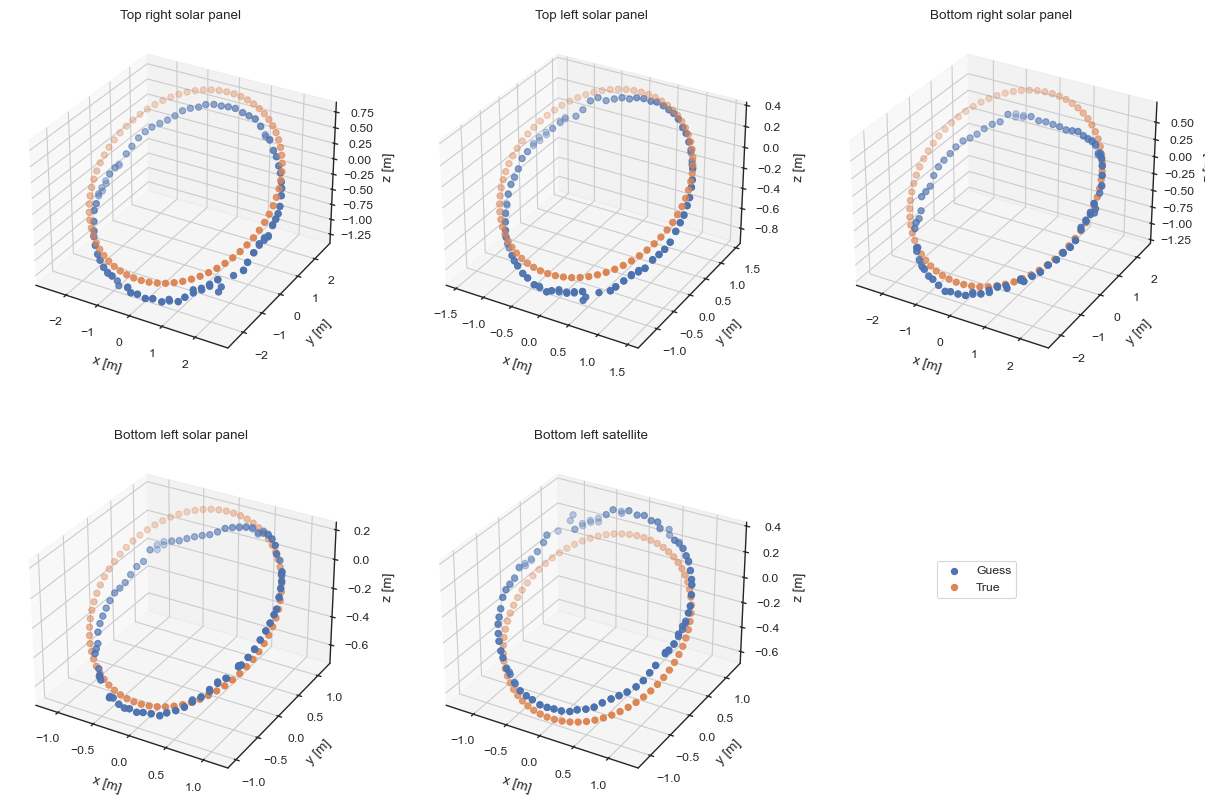

In [336]:
# 3d subplots
fig = plt.figure(figsize=(15, 10))
for i, point in enumerate(three_d_points):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    ax.title.set_text(three_d_points_names[i])
    # labels
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_zlabel('z [m]')
    ax.scatter(df_rotated_points[df_rotated_points['3d_point'] == three_d_points_names[i]]['x_point'],
               df_rotated_points[df_rotated_points['3d_point'] == three_d_points_names[i]]['y_point'],
               df_rotated_points[df_rotated_points['3d_point'] == three_d_points_names[i]]['z_point'],
               label=three_d_points_names[i])
    ax.scatter(
        df_rotated_points_true[df_rotated_points_true['3d_point'] == three_d_points_names[i]]['x_point'],
        df_rotated_points_true[df_rotated_points_true['3d_point'] == three_d_points_names[i]]['y_point'],
        df_rotated_points_true[df_rotated_points_true['3d_point'] == three_d_points_names[i]]['z_point'],
        label=three_d_points_names[i] + ' true')

# ax.set_xlabel('x [m]')
# ax.set_ylabel('y [m]')
# ax.set_zlabel('z [m]')
# ax.scatter(df_rotated_points[df_rotated_points['3d_point'] == three_d_points_names[0]]['x'],
#            df_rotated_points[df_rotated_points['3d_point'] == three_d_points_names[0]]['y'],
#            df_rotated_points[df_rotated_points['3d_point'] == three_d_points_names[0]]['z'])

# add legend bottom right in the figure
fig.legend(['Guess', 'True'], loc='lower right', bbox_to_anchor=(0.8, 0.3))
plt.savefig(folder + "/plots/3d_points.png")

In [337]:
df_rotated_points_all = df_rotated_points.merge(df_rotated_points_true, on=['img_number', '3d_point'],
                                                suffixes=('_fine', '_true'))

In [365]:
df_rotated_points_all

,x_point_fine,y_point_fine,z_point_fine,img_number,3d_point,iterations,loss,roll_fine,pitch_fine,yaw_fine,...,z,x_point_true,y_point_true,z_point_true,roll_true,pitch_true,yaw_true,residual_x,residual_y,residual_z
0,-0.839649,0.861605,0.315567,1,Bottom left satellite,728,1123.213127,153.323242,-59.821898,-77.152341,...,-0.252949,-0.922529,0.832928,0.046125,163.328561,-72.431496,-82.098936,0.082880,0.028677,0.269442
1,0.998297,0.593370,0.026096,1,Bottom left solar panel,728,1123.213127,153.323242,-59.821898,-77.152341,...,-0.252949,0.949671,0.668936,0.004120,163.328561,-72.431496,-82.098936,0.048626,-0.075566,0.021976
2,2.404792,0.293431,-0.237129,1,Bottom right solar panel,728,1123.213127,153.323242,-59.821898,-77.152341,...,-0.252949,2.393095,0.442752,-0.049217,163.328561,-72.431496,-82.098936,0.011697,-0.149320,-0.187912
3,0.471705,-1.095449,-0.863280,1,Top left solar panel,728,1123.213127,153.323242,-59.821898,-77.152341,...,-0.252949,0.635609,-1.200281,-0.568413,163.328561,-72.431496,-82.098936,-0.163904,0.104832,-0.294867
4,1.878199,-1.395388,-1.126506,1,Top right solar panel,728,1123.213127,153.323242,-59.821898,-77.152341,...,-0.252949,2.079033,-1.426465,-0.621750,163.328561,-72.431496,-82.098936,-0.200834,0.031077,-0.504756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-0.989243,0.726906,0.199904,72,Bottom left satellite,511,0.030996,161.907821,-63.629792,-75.527345,...,-0.410926,-0.989041,0.753872,0.020752,168.680000,-72.540000,-82.470000,-0.000202,-0.026965,0.179152
356,0.886266,0.747274,0.074040,72,Bottom left solar panel,511,0.030996,161.907821,-63.629792,-75.527345,...,-0.410926,0.890745,0.744955,0.031343,168.680000,-72.540000,-82.470000,-0.004480,0.002319,0.042697
357,2.340073,0.667813,-0.058656,72,Bottom right solar panel,511,0.030996,161.907821,-63.629792,-75.527345,...,-0.410926,2.348836,0.638734,0.018492,168.680000,-72.540000,-82.470000,-0.008763,0.029079,-0.077148
358,0.712322,-1.039145,-0.761933,72,Top left solar panel,511,0.030996,161.907821,-63.629792,-75.527345,...,-0.410926,0.748146,-1.142036,-0.551179,168.680000,-72.540000,-82.470000,-0.035824,0.102891,-0.210754


In [368]:
cols = ['img_number', 'x_point_fine', 'y_point_fine', 'z_point_fine', 'x_point_true', 'y_point_true',
        'z_point_true', 'residual_x', 'residual_y', 'residual_z']

df_rotated_points_all_tr = df_rotated_points_all[df_rotated_points_all['3d_point'] == 'Top right solar panel']

In [339]:
df_rotated_points_all['residual_x'] = df_rotated_points_all['x_point_fine'] - df_rotated_points_all['x_point_true']
df_rotated_points_all['residual_y'] = df_rotated_points_all['y_point_fine'] - df_rotated_points_all['y_point_true']
df_rotated_points_all['residual_z'] = df_rotated_points_all['z_point_fine'] - df_rotated_points_all['z_point_true']

In [340]:
# for var in ['x', 'y', 'z']:
#     g = sns.displot(data=df_rotated_points_all, x='residual_' + var, hue='3d_point', kind='kde');
#     g.fig.subplots_adjust(top=0.9)
#     g.fig.suptitle('Residuals for rotated ' + var + ' point')
#     for ax in g.axes.flat:
#         ax.set(xlabel='Independent variable ' + var + ' [m]')

In [341]:
# only show top right solar panel
df_rotated_points_all[df_rotated_points_all['3d_point'] == 'Top right solar panel']

,x_point_fine,y_point_fine,z_point_fine,img_number,3d_point,iterations,loss,roll_fine,pitch_fine,yaw_fine,...,z,x_point_true,y_point_true,z_point_true,roll_true,pitch_true,yaw_true,residual_x,residual_y,residual_z
4,1.878199,-1.395388,-1.126506,1,Top right solar panel,728,1.123213e+03,153.323242,-59.821898,-77.152341,...,-0.252949,2.079033,-1.426465,-0.621750,163.328561,-72.431496,-82.098936,-0.200834,0.031077,-0.504756
9,1.918182,-1.510037,-0.885505,2,Top right solar panel,490,3.517797e-11,160.791879,-64.480795,-85.072976,...,-0.476752,1.935993,-1.593612,-0.675342,158.012812,-72.313082,-81.765088,-0.017811,0.083575,-0.210163
14,1.761921,-1.660566,-0.939100,3,Top right solar panel,651,1.230418e-09,156.693282,-64.454293,-86.003940,...,-0.473769,1.778205,-1.748425,-0.724397,152.734907,-72.185841,-81.470747,-0.016284,0.087859,-0.214703
19,1.593631,-1.794318,-0.992229,4,Top right solar panel,1246,3.978089e-10,153.626644,-63.943973,-88.061305,...,-0.529154,1.606870,-1.889726,-0.768543,147.496508,-72.050911,-81.217702,-0.013239,0.095409,-0.223686
24,1.422304,-1.925390,-1.006817,5,Top right solar panel,1015,1.890654e+00,150.311431,-64.620556,-89.583903,...,-0.629154,1.423292,-2.016440,-0.807444,142.298795,-71.909474,-81.007242,-0.000988,0.091050,-0.199374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2.505875,-0.373201,-0.570148,68,Top right solar panel,434,6.444385e-02,177.921739,-67.169648,-71.522941,...,-0.405424,2.539279,-0.452973,-0.301055,-169.617547,-72.856025,-84.263080,-0.033404,0.079772,-0.269094
344,2.451164,-0.566357,-0.644042,69,Top right solar panel,392,1.236627e-11,174.830074,-65.917620,-73.350599,...,-0.476432,2.483793,-0.661182,-0.370632,-175.080481,-72.796366,-83.776006,-0.032629,0.094824,-0.273410
349,2.370463,-0.745420,-0.754329,70,Top right solar panel,371,4.026313e-01,169.699575,-64.584385,-73.134380,...,-0.517207,2.409390,-0.864153,-0.437991,179.478850,-72.723313,-83.312070,-0.038927,0.118734,-0.316338
354,2.301314,-0.831788,-0.869389,71,Top right solar panel,700,2.831010e+03,162.982091,-63.987199,-69.067058,...,-0.540260,2.316636,-1.060343,-0.502622,174.064476,-72.637581,-82.875478,-0.015321,0.228555,-0.366767


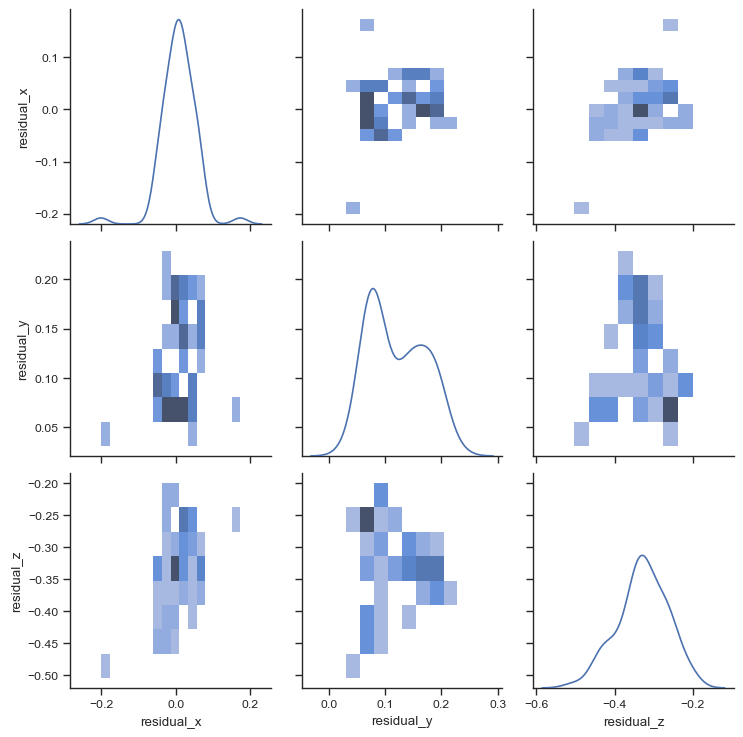

In [342]:
g = sns.PairGrid(df_rotated_points_all[df_rotated_points_all['3d_point'] == 'Top right solar panel'],
                 vars=['residual_x', 'residual_y', 'residual_z'])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.histplot)
# share x and y axis

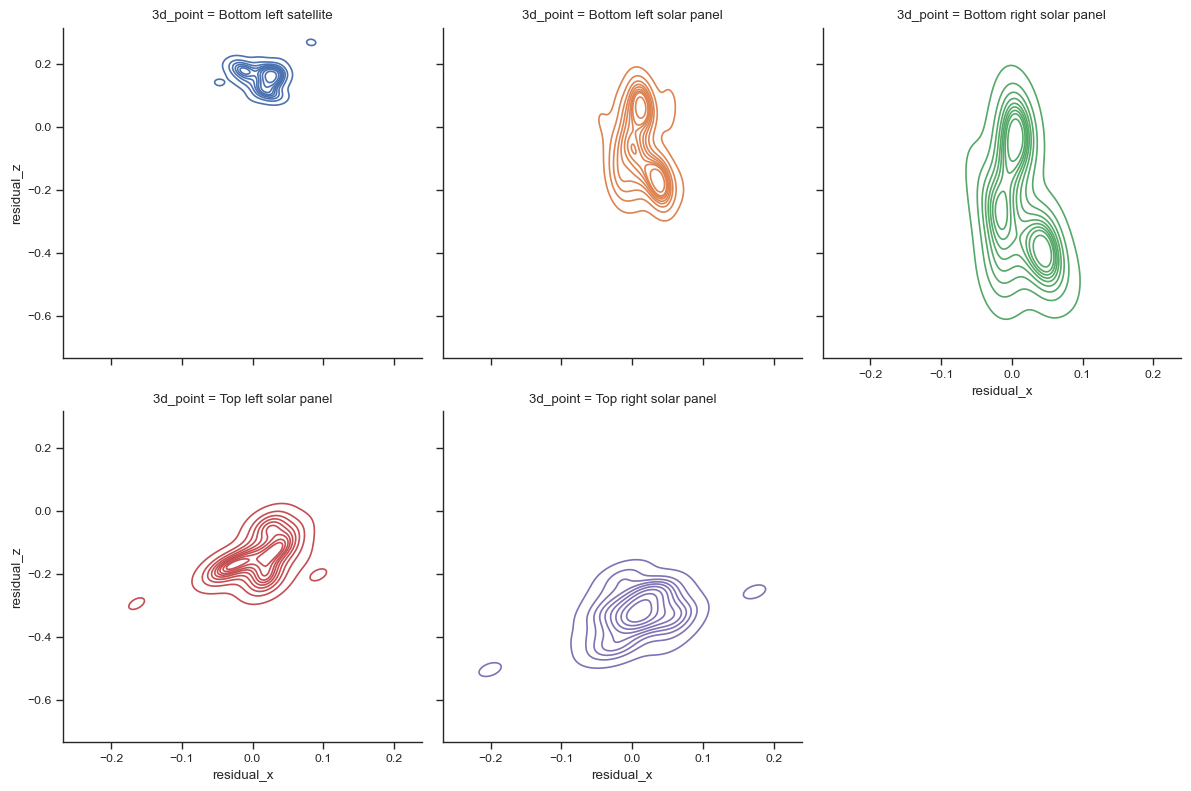

In [343]:
sns.FacetGrid(df_rotated_points_all, col='3d_point', hue='3d_point', col_wrap=3, height=4) \
    .map(sns.kdeplot, 'residual_x', 'residual_z')

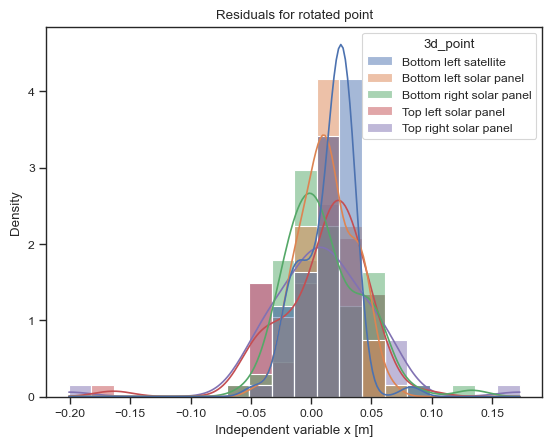

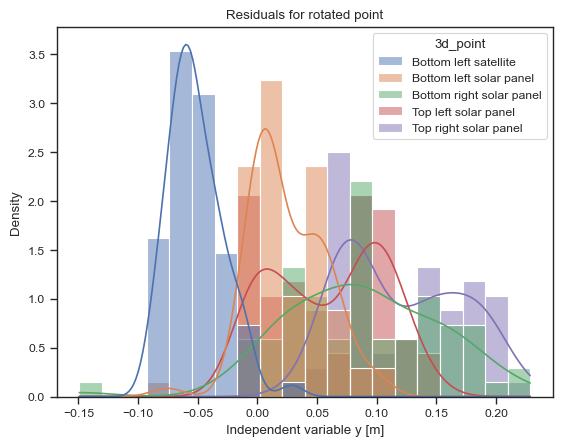

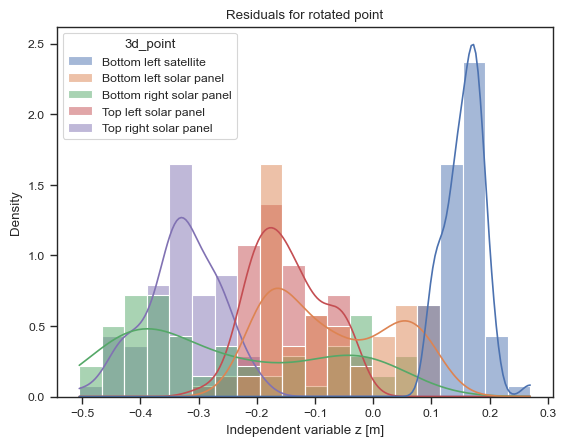

In [344]:
for var in ['x', 'y', 'z']:
    g = sns.histplot(data=df_rotated_points_all,
                     x='residual_' + var,
                     hue='3d_point',
                     kde=True, stat='density',
                     bins=20);
    # stack
    # g = sns.histplot(data=df_rotated_points_all, x='residual_' + var, hue='3d_point', kde=True, stat='density',
    #                  bins=20, multiple='stack');
    # mean = df_rotated_points_all['residual_' + var].mean()
    # plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)
    g.set_title('Residuals for rotated point')
    g.set(xlabel='Independent variable ' + var + ' [m]')
    plt.savefig(folder + "/plots/" + var + '_residuals.png')
    plt.show()